In [5]:
#!python /c/repos/ReX/ReX/rex.py /c/repos/Explainable-AI/ReX/cat_1.png -c --model /c/repos/Explainable-AI/ReX/my_model.h5

TypeError: Image data of dtype object cannot be converted to float

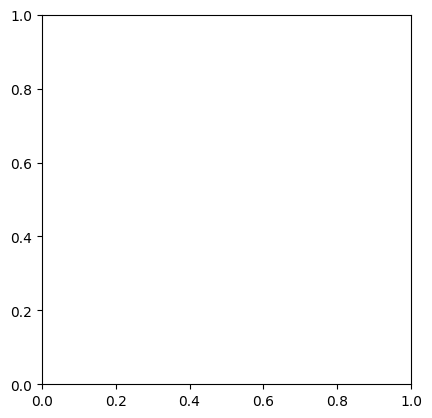

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.tif')

plt.imshow(image)
plt.axis('off')

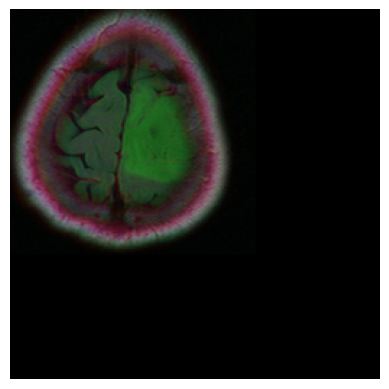

True

In [7]:
import numpy as np
import tifffile as tiff

image2 = np.zeros((256, 256, 3), dtype=np.uint8)
cropped = image[50:220, 50:220, :]
image2[0:170, 0:170, :] = cropped

plt.imshow(image2)
plt.axis('off')
plt.show()

cv2.imwrite('2.tif', image2)

1/1 [==============================] - 1s 1s/step
Predicted: [('n02089973', 'English_foxhound', 1.0), ('n07614500', 'ice_cream', 1.1422357e-16), ('n07747607', 'orange', 2.2923747e-18)]


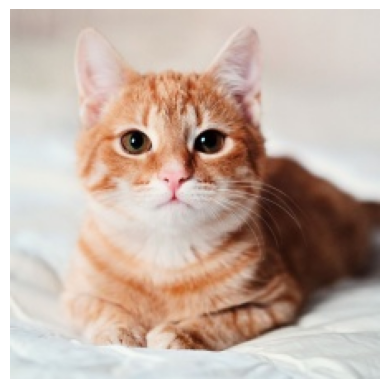

In [8]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


path_to_image = "cat_resized.jpg";
img = cv2.imread(path_to_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img0 = img[0:224, 0:224, :]
dim = (224, 224)
img0 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img1 = np.expand_dims(img0, axis=0)
prediction = model.predict(img1)
plt.imshow(img0)
plt.axis('off')

print('Predicted:', decode_predictions(prediction, top=3)[0])

True

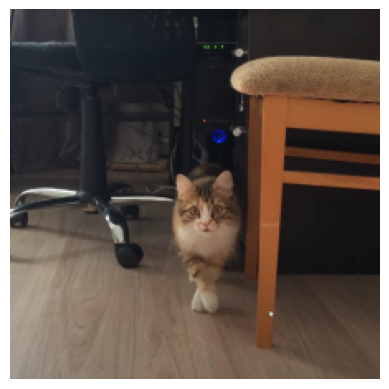

In [9]:
path_to_image = "cat_1.png";
img = cv2.imread(path_to_image)
#img = img[100:1000, 600:1500, :]
dim = (224, 224)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite(path_to_image, img)

In [10]:
model = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model.save("my_model.h5")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from subprocess import Popen, PIPE, CalledProcessError

cmd=    [
            "python",
            "/repos/ReX/ReX/rex.py",
            "/repos/Explainable-AI/ReX/yolo/yorex_images/1/image.jpg",
            "-c",
            "--model",
            "/repos/Explainable-AI/ReX/yolov8n.pt",
            "--strategy",
            "linear",
            "--output",
            "/repos/Explainable-AI/ReX/car_1.jpg"
        ]

with Popen(cmd, stdout=PIPE, bufsize=1, universal_newlines=True) as p:
    for line in p.stdout:
        print(line, end='') # process line here

if p.returncode != 0:
    raise CalledProcessError(p.returncode, p.args)

INFO:ReX:random seed = 42
INFO:ReX:main causal loop for process 0: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:main causal loop for process 0: iter = 0, depth reached = 1, total work so far = 0
INFO:ReX:random seed = 43
INFO:ReX:main causal loop for process 1: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 44
INFO:ReX:main causal loop for process 2: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 45
INFO:ReX:main causal loop for process 3: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 46
INFO:ReX:main causal loop for process 4: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 47
INFO:ReX:main causal loop for process 5: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 48
INFO:ReX:main causal loop for process 6: iter = 0, depth reached = 0, total work so far = 0
INFO:ReX:random seed = 49
INFO:ReX:main causal loop for process 7: iter = 0, depth

: 

In [13]:
import os

path = '/repos/Explainable-AI/ReX/'

print(os.path.isdir(path))

True


In [25]:
a = np.arange(10)
b = np.where(a>5, a, 0)

print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 6 7 8 9]


In [2]:
import pickle 

file_path = f'yolo/00000001_car_0.pkl'
with open(file_path, 'rb') as pickle_file:
    yolo_result = pickle.load(pickle_file)

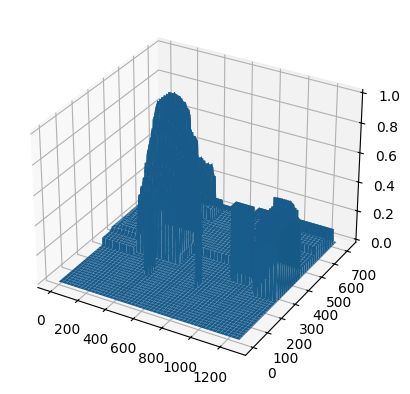

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, yolo_result.shape[1])
y = np.arange(0, yolo_result.shape[0])
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, yolo_result)

plt.show()

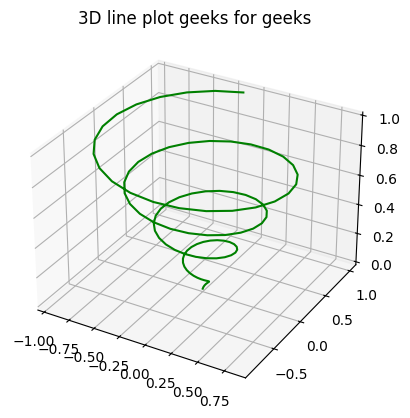

In [4]:
yolo_result.shape

(720, 1280)